In [18]:
# import liberies

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from dateutil import parser
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read in he data

df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Portfolio\Pregnancy.csv')

In [14]:
df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date,Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,20-Dec,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,20-Dec,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,20-Oct,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [3]:
# Check for missing values

missing_values = df[['Household_Income', 'Maternal_Education']].isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Household_Income      251
Maternal_Education    177
dtype: int64


In [4]:
# Drop rows with missing values

df_cleaned = df.dropna(subset=['Household_Income', 'Maternal_Education'])

In [15]:
print(df.columns)


Index(['OSF_ID', 'Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth', 'Delivery_Date', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Language',
       'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')


# How do average Edinburgh Postnatal Depression Scale (EPDS) and PROMIS Anxiety scores vary over different months during the COVID-19 pandemic?

In [20]:
# Manually parse the 'Delivery_Date(converted to month and year)' column

def parse_date(date_str):
    try:
        return parser.parse(date_str)
    except:
        return pd.NaT

In [22]:
# Apply the function to parse dates

df['Delivery_Date'] = df['Delivery_Date'].apply(parse_date)

In [23]:
# Drop rows where the date could not be parsed

df = df.dropna(subset=['Delivery_Date'])

In [27]:
# Use .loc to modify the DataFrame in place

df.loc[:, 'Month'] = df['Delivery_Date'].dt.month
df.loc[:, 'Year'] = df['Delivery_Date'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_18256\1970356544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['Delivery_Date'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_18256\1970356544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year'] = df['Delivery_Date'].dt.year


In [29]:
# Group by 'Month' and 'Year' and calculate average scores

monthly_avg_scores = df.groupby(['Year', 'Month'])[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()

In [ ]:
# plot the trend

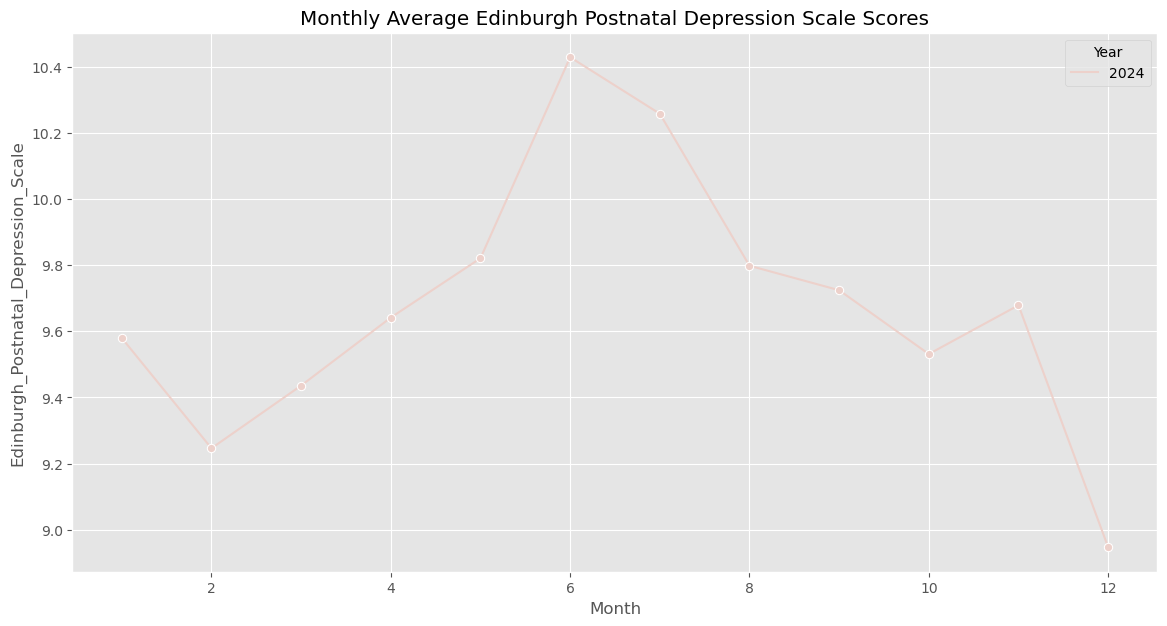

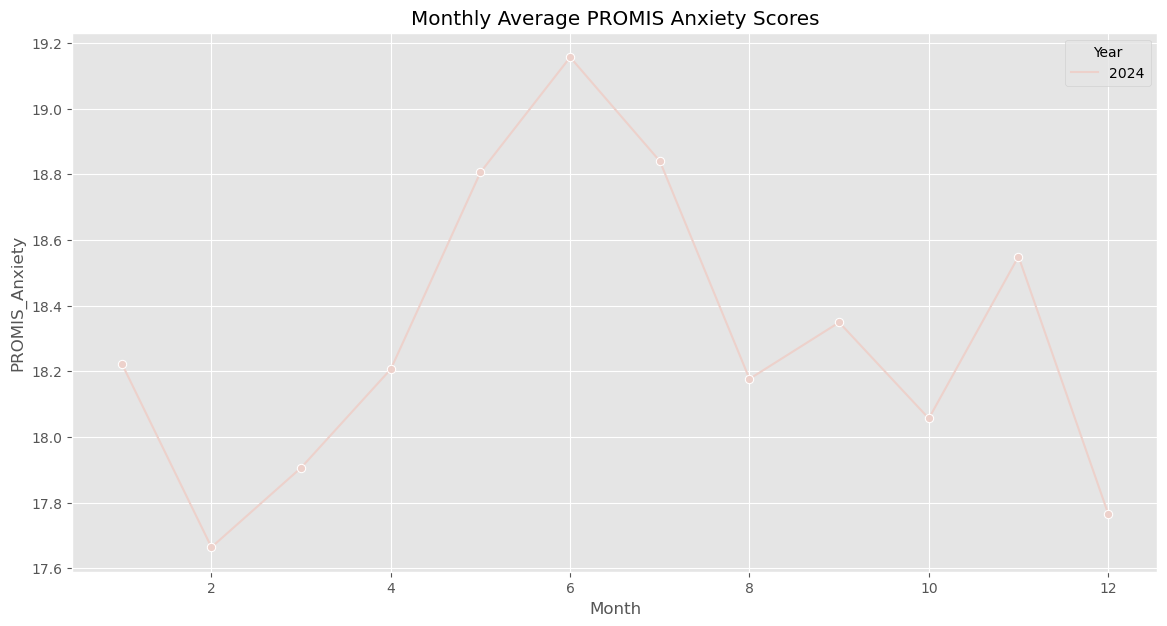

In [30]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg_scores, x='Month', y='Edinburgh_Postnatal_Depression_Scale', hue='Year', marker='o')
plt.title('Monthly Average Edinburgh Postnatal Depression Scale Scores')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg_scores, x='Month', y='PROMIS_Anxiety', hue='Year', marker='o')
plt.title('Monthly Average PROMIS Anxiety Scores')
plt.show()

# Are there noticeable trends in mental health scores when grouped by maternal age?

In [32]:
# Make a copy of the DataFrame to avoid the SettingWithCopyWarning

df = df.copy()

# Define age groups

bins = [0, 25, 30, 35, 40, 50]
labels = ['<25', '25-29', '30-34', '35-39', '40+']

# Create age group column

df.loc[:, 'Age_Group'] = pd.cut(df['Maternal_Age'], bins=bins, labels=labels, right=False)

# Verify the new column

print(df[['Maternal_Age', 'Age_Group']].head())


   Maternal_Age Age_Group
0          38.3     35-39
3          28.8     25-29
4          36.5     35-39
5          38.3     35-39
7           NaN       NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_18256\559395982.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Age_Group'] = pd.cut(df['Maternal_Age'], bins=bins, labels=labels, right=False)


In [34]:
# group by age group and calculate avereg scores

age_group_avg_scores = df.groupby('Age_Group')[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()


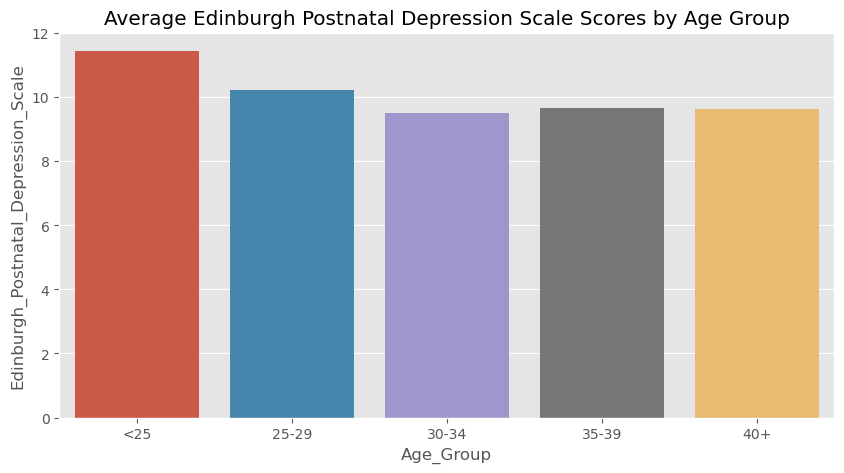

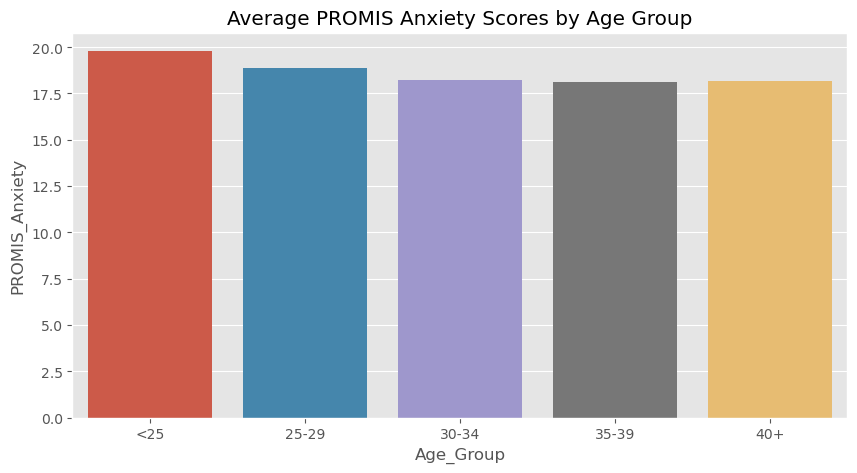

In [35]:
# plot the trend 

plt.figure(figsize=(10, 5))
sns.barplot(data=age_group_avg_scores, x='Age_Group', y='Edinburgh_Postnatal_Depression_Scale')
plt.title('Average Edinburgh Postnatal Depression Scale Scores by Age Group')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=age_group_avg_scores, x='Age_Group', y='PROMIS_Anxiety')
plt.title('Average PROMIS Anxiety Scores by Age Group')
plt.show()

# How does household income correlate with maternal depression and anxiety scores?

In [36]:
# convert house income to numberical category 

income_map = {
    '$40,000-$69,999': 1,
    '$70,000-$99,999': 2,
    '$100,000 -$124,999': 3,
    '$125,000- $149,999': 4,
    '$150,000 - $174,999': 5,
    '$200,000+': 6
}
df['Income_Category'] = df['Household_Income'].map(income_map)


In [37]:
# calculate correlation

correlation_depression = df['Income_Category'].corr(df['Edinburgh_Postnatal_Depression_Scale'])
correlation_anxiety = df['Income_Category'].corr(df['PROMIS_Anxiety'])
print(f'Correlation between Income and Depression Scores: {correlation_depression}')
print(f'Correlation between Income and Anxiety Scores: {correlation_anxiety}')


Correlation between Income and Depression Scores: -0.12856437876052668
Correlation between Income and Anxiety Scores: -0.10790476010558792


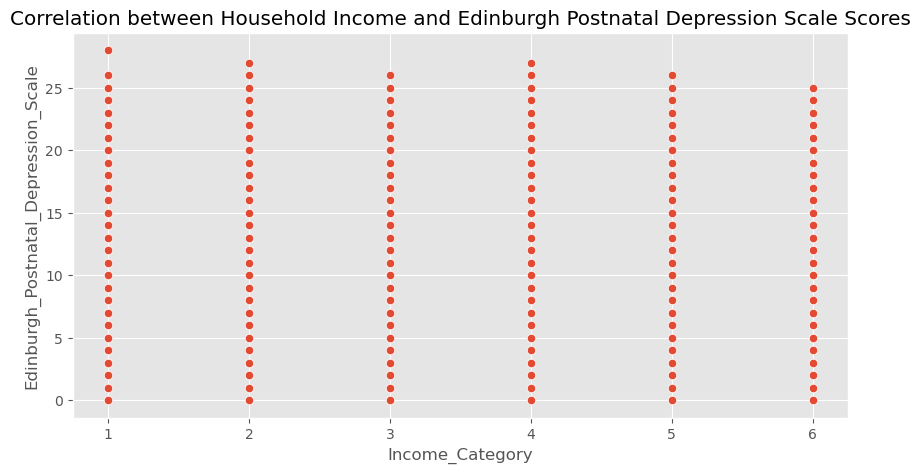

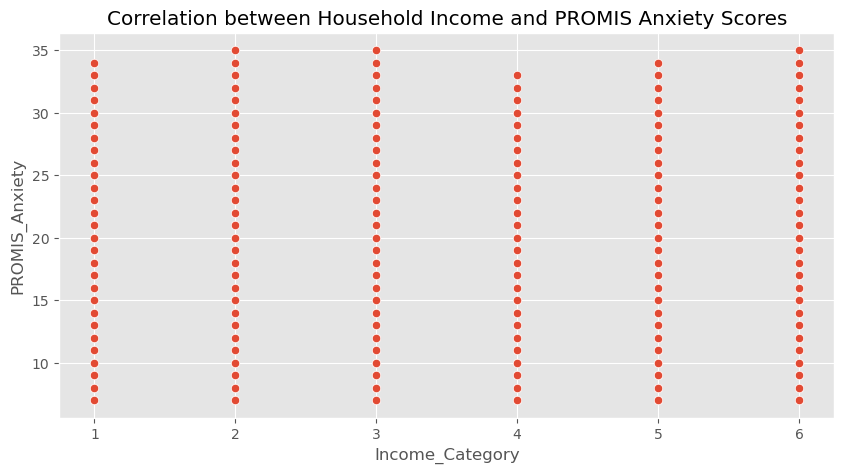

In [38]:
# plot correlations 

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income_Category', y='Edinburgh_Postnatal_Depression_Scale')
plt.title('Correlation between Household Income and Edinburgh Postnatal Depression Scale Scores')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income_Category', y='PROMIS_Anxiety')
plt.title('Correlation between Household Income and PROMIS Anxiety Scores')
plt.show()

# Is there a significant difference in mental health scores based on the mode of delivery (vaginally vs. c-section)?

In [39]:
# group by delevery_mode and averge score

delivery_mode_avg_scores = df.groupby('Delivery_Mode')[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()

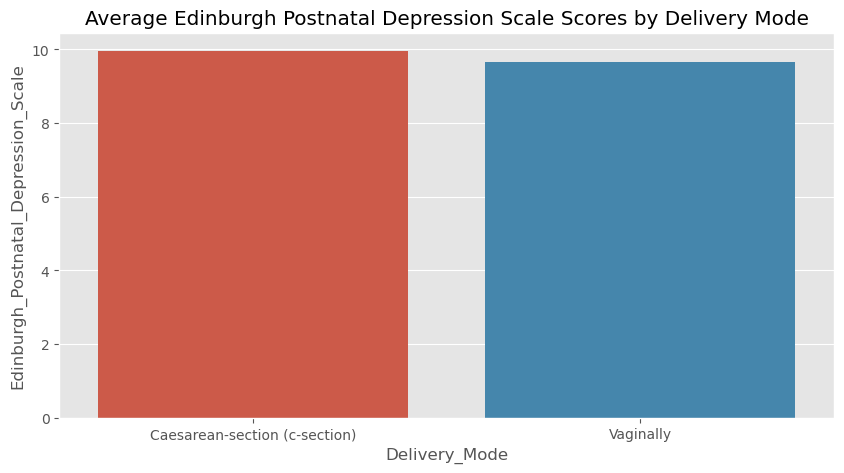

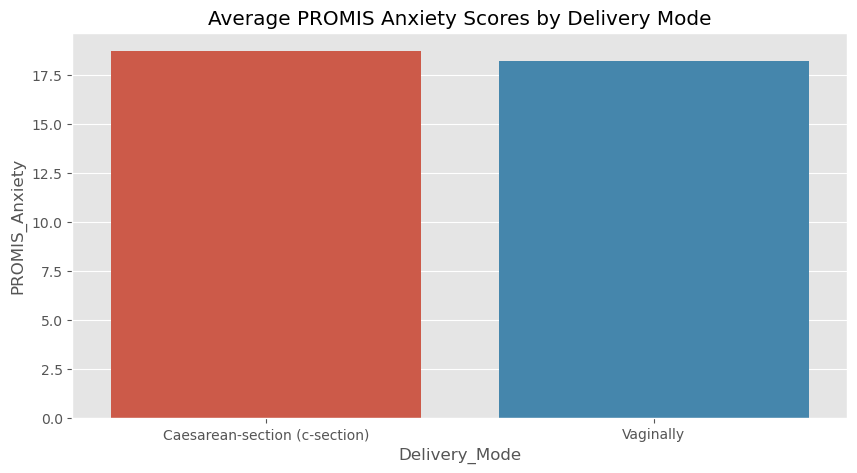

In [40]:
# plot the differences 

plt.figure(figsize=(10, 5))
sns.barplot(data=delivery_mode_avg_scores, x='Delivery_Mode', y='Edinburgh_Postnatal_Depression_Scale')
plt.title('Average Edinburgh Postnatal Depression Scale Scores by Delivery Mode')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=delivery_mode_avg_scores, x='Delivery_Mode', y='PROMIS_Anxiety')
plt.title('Average PROMIS Anxiety Scores by Delivery Mode')
plt.show()

#  What is the relationship between maternal education level and mental health scores (EPDS and PROMIS Anxiety)?

In [41]:
# Group by Maternal Education Level and Calculate Average Scores:

education_group = df.groupby('Maternal_Education')[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()


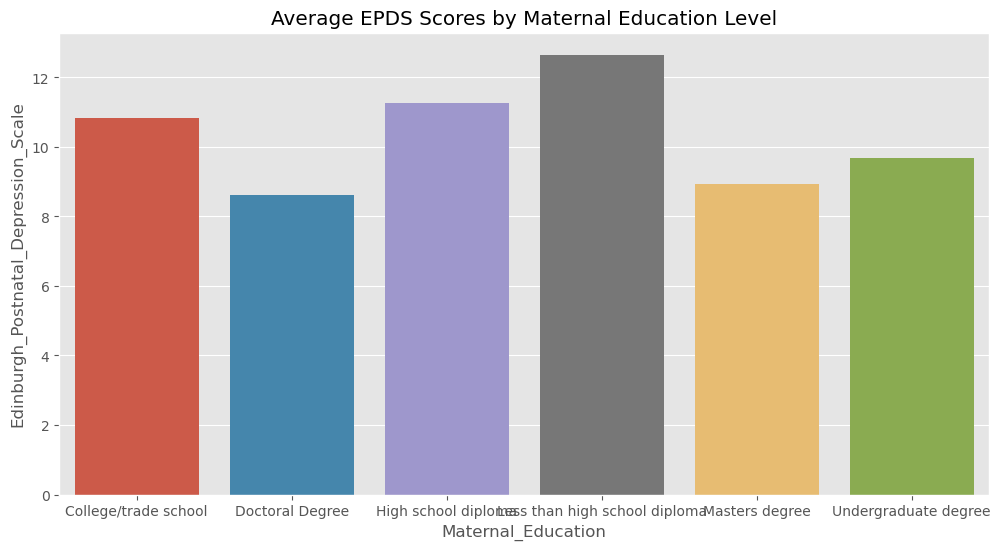

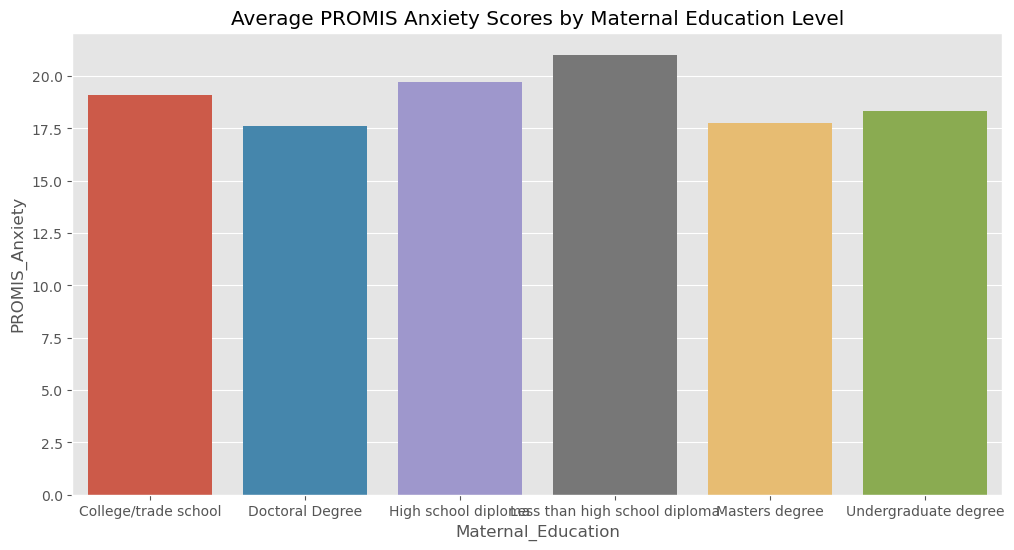

In [42]:
# Virtualize relationship

plt.figure(figsize=(12, 6))
sns.barplot(x='Maternal_Education', y='Edinburgh_Postnatal_Depression_Scale', data=education_group)
plt.title('Average EPDS Scores by Maternal Education Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Maternal_Education', y='PROMIS_Anxiety', data=education_group)
plt.title('Average PROMIS Anxiety Scores by Maternal Education Level')
plt.show()

# How does maternal age impact depression and anxiety scores during pregnancy?

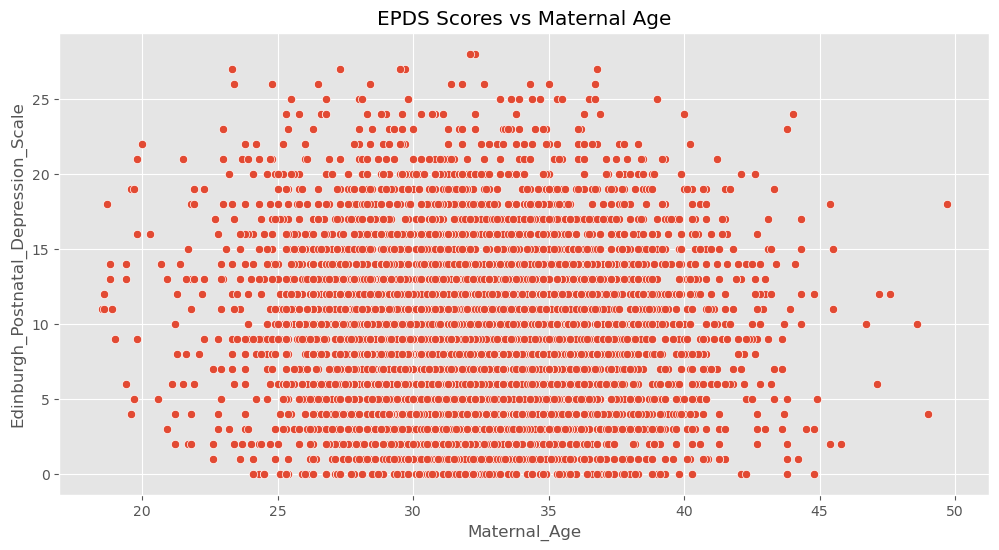

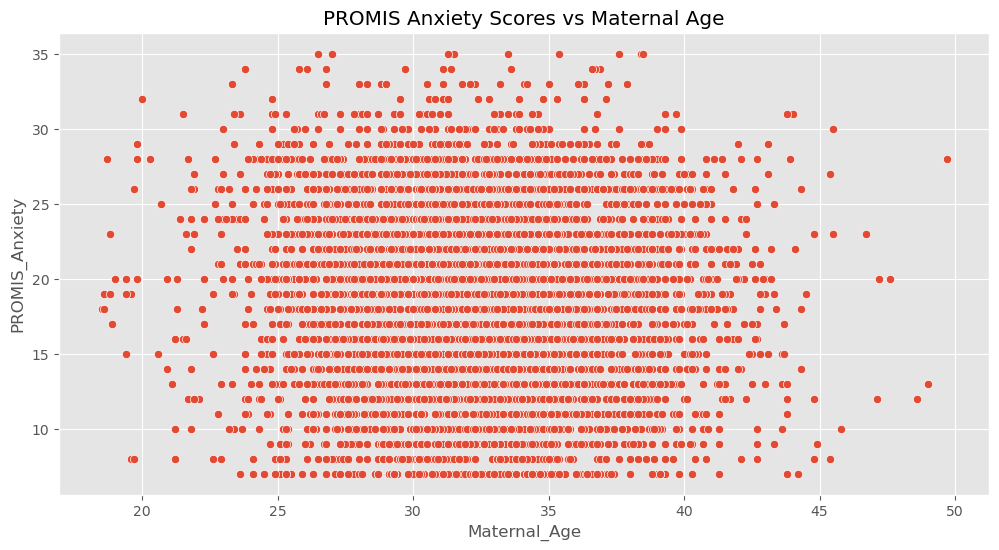

In [43]:
# plot the relationship 

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Maternal_Age', y='Edinburgh_Postnatal_Depression_Scale', data=df)
plt.title('EPDS Scores vs Maternal Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Maternal_Age', y='PROMIS_Anxiety', data=df)
plt.title('PROMIS Anxiety Scores vs Maternal Age')
plt.show()

In [44]:
# calculate correlation 

correlation_epds = df[['Maternal_Age', 'Edinburgh_Postnatal_Depression_Scale']].corr()
correlation_anxiety = df[['Maternal_Age', 'PROMIS_Anxiety']].corr()

print("Correlation between Maternal Age and EPDS:", correlation_epds)
print("Correlation between Maternal Age and PROMIS Anxiety:", correlation_anxiety)


Correlation between Maternal Age and EPDS:                                       Maternal_Age  \
Maternal_Age                              1.000000   
Edinburgh_Postnatal_Depression_Scale     -0.057892   

                                      Edinburgh_Postnatal_Depression_Scale  
Maternal_Age                                                     -0.057892  
Edinburgh_Postnatal_Depression_Scale                              1.000000  
Correlation between Maternal Age and PROMIS Anxiety:                 Maternal_Age  PROMIS_Anxiety
Maternal_Age        1.000000       -0.060999
PROMIS_Anxiety     -0.060999        1.000000


#  Does household income play a significant role in maternal mental health outcomes?

In [45]:
# Group by Household Income and Calculate Average Scores:

income_group = df.groupby('Household_Income')[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()


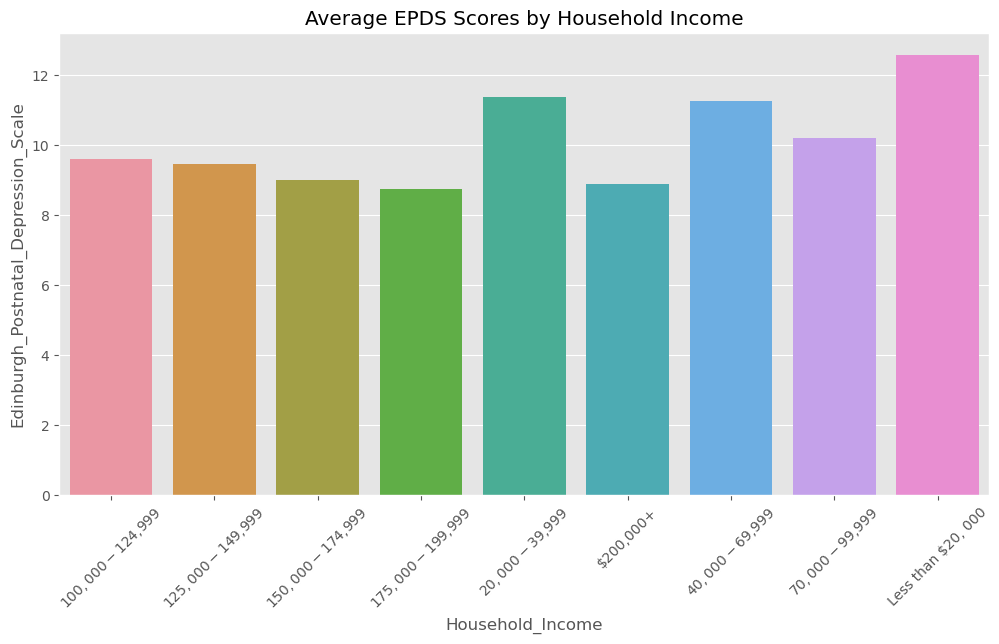

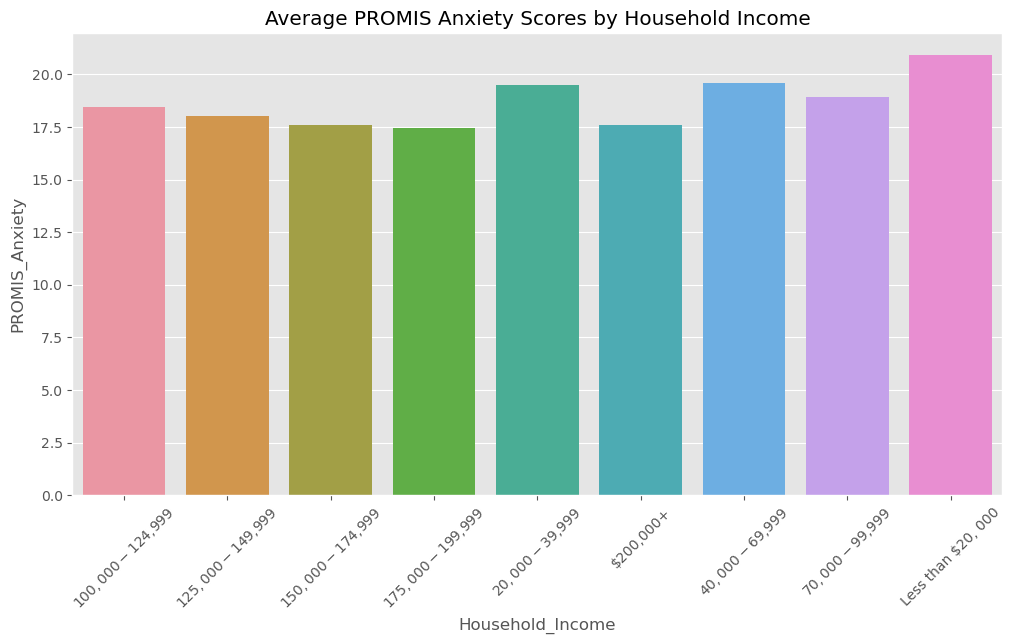

In [47]:
# Visualize the Relationship:

plt.figure(figsize=(12, 6))
sns.barplot(x='Household_Income', y='Edinburgh_Postnatal_Depression_Scale', data=income_group)
plt.title('Average EPDS Scores by Household Income')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Household_Income', y='PROMIS_Anxiety', data=income_group)
plt.title('Average PROMIS Anxiety Scores by Household Income')
plt.xticks(rotation=45)
plt.show()

# Are there differences in mental health scores between mothers who had a NICU stay for their babies and those who did not?

In [48]:
# Group by NICU Stay and Calculate Average Scores

nicu_group = df.groupby('NICU_Stay')[['Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety']].mean().reset_index()

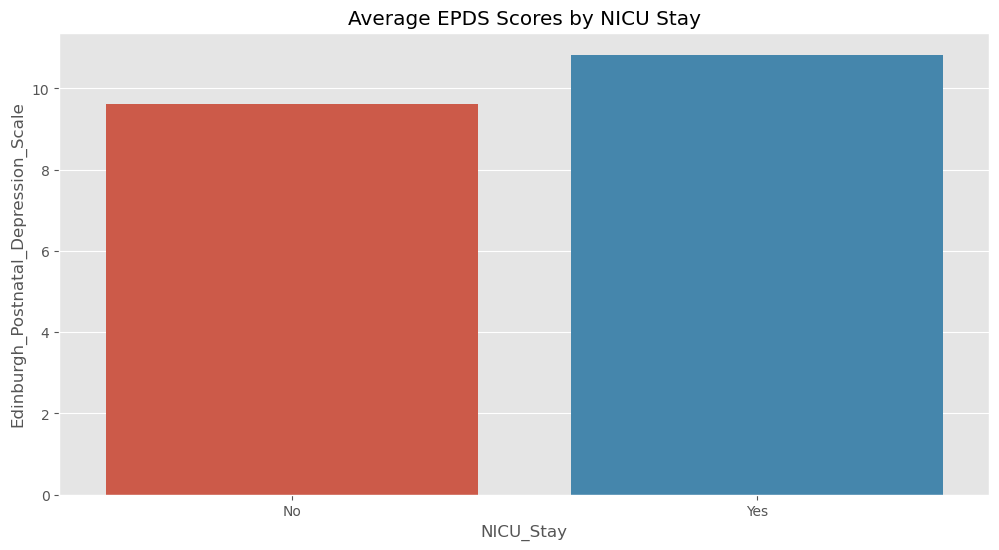

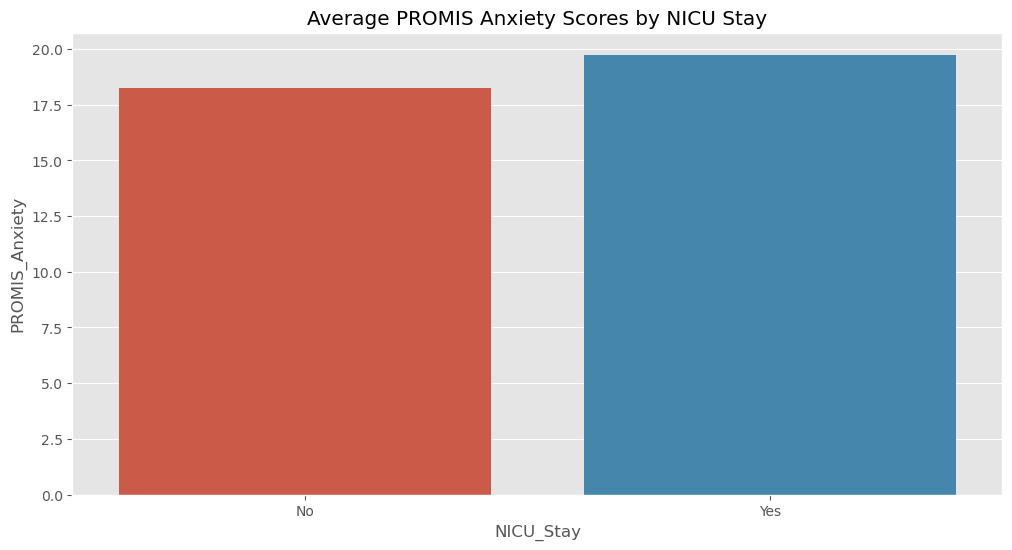

In [49]:
# Visualize the Relationship:

plt.figure(figsize=(12, 6))
sns.barplot(x='NICU_Stay', y='Edinburgh_Postnatal_Depression_Scale', data=nicu_group)
plt.title('Average EPDS Scores by NICU Stay')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='NICU_Stay', y='PROMIS_Anxiety', data=nicu_group)
plt.title('Average PROMIS Anxiety Scores by NICU Stay')
plt.show()